In [116]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [103]:
dba = pd.read_csv('global_items.csv')
used_dba = [0,1,2,3,6,7,8]
dba = dba.iloc[:,used_dba]

In [165]:
sdca = pd.read_csv('sdca_global.csv')
used_sdca = [0,1,2,3,6,7,8]
sdca = sdca.iloc[:,used_sdca]

In [168]:
sdca

,"aih_53. If you are traveling in a self-driving car, and the car is in control of the speed, what range speed would you feel most comfortable with when driving on: HIGHWAY ROADS","aih_54. If you are traveling in a self-driving car, on HIGHWAY ROADS, you expect the car to change lanes:","aih_55. If you are traveling in a self-driving car, on HIGHWAY ROADS ,your preference for the way it accelerates and decelerate would be:","aih_56. If you are traveling in a self-driving car, how often would you expect the car to pass other vehicles when driving on: HIGHWAY ROADS","ainh_48. If you are traveling in a self-driving car, on NON-HIGHWAY ROADS, you expect the car to change lanes:","ainh_49. If you are traveling in a self-driving car, on NON-HIGHWAY ROADS ,your preference for the way it accelerates and decelerate would be:","ainh_50. If you are traveling in a self-driving car, how often would you expect the car to pass other vehicles when driving on: NON-HIGHWAY ROADS"
0,0.0,0.0,0.5,0.0,0.0,0.5,0.0
1,0.5,0.5,0.5,0.5,0.0,0.5,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.5,0.5,0.5,0.0,0.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
152,0.5,0.0,0.0,0.0,0.0,0.0,0.0
153,0.5,0.5,0.5,0.5,0.5,0.5,0.5
154,0.5,0.5,0.5,0.5,0.0,0.5,0.0
155,0.5,0.0,0.5,0.5,0.5,0.5,0.5


In [27]:
aidmt = pd.read_csv('aidmt_global.csv')
used_aidmt = [0,1,2,3,4,5]
aidmt = aidmt.iloc[:,used_aidmt]

In [28]:
ait = pd.read_csv('ait_global.csv')
used_ait = [0,2,3,4,5,6]
ait = ait.iloc[:,used_ait]

In [29]:
dss = pd.read_csv('dss_global.csv')
used_dss = [1,2,3,5,7,8,9]
dss = dss.iloc[:,used_dss]

In [42]:
scales = [dba, sdca, aidmt, dss]
names = ['DBA', 'SDCA','AIDMT', 'DSS']

In [170]:
test = pd.DataFrame()
test['DBA'] = dba.mean(axis = 1)
test['SDCA'] = sdca.mean(axis = 1)   
test['AIDMT'] = aidmt.mean(axis = 1)   
test['AIT'] = ait.mean(axis = 1)   
test['DSS'] = dss.mean(axis = 1)   


In [171]:
test.corr()

,DBA,SDCA,AIDMT,AIT,DSS
DBA,1.000000,0.364718,0.101817,-0.080623,0.522611
SDCA,0.364718,1.000000,0.266252,0.299933,0.494453
AIDMT,0.101817,0.266252,1.000000,0.635581,-0.039634
AIT,-0.080623,0.299933,0.635581,1.000000,0.037365
DSS,0.522611,0.494453,-0.039634,0.037365,1.000000


In [169]:
test.describe()

,DBA,SDCA,AIDMT,AIT,DSS
count,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.400136,0.355892,0.546178,0.480626,0.222247
std,0.182992,0.223860,0.267529,0.247068,0.163543
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.125000,0.375000,0.291667,0.107143
50%,0.428571,0.375000,0.541667,0.500000,0.214286
75%,0.500000,0.500000,0.791667,0.625000,0.321429
max,0.785714,1.000000,1.000000,1.000000,0.750000


In [172]:
dba.mean(axis = 1).describe()

count    157.000000
mean       0.400136
std        0.182992
min        0.000000
25%        0.285714
50%        0.428571
75%        0.500000
max        0.785714
dtype: float64

In [173]:
sdca.mean(axis = 1).describe()

count    157.000000
mean       0.325751
std        0.208772
min        0.000000
25%        0.214286
50%        0.357143
75%        0.500000
max        1.000000
dtype: float64

In [62]:
ait.mean(axis = 1).describe()

count    157.000000
mean       0.480626
std        0.247068
min        0.000000
25%        0.291667
50%        0.500000
75%        0.625000
max        1.000000
dtype: float64

In [61]:
aidmt.mean(axis = 1).describe()

count    157.000000
mean       0.546178
std        0.267529
min        0.000000
25%        0.375000
50%        0.541667
75%        0.791667
max        1.000000
dtype: float64

In [63]:
dss.mean(axis = 1).describe()

count    157.000000
mean       0.222247
std        0.163543
min        0.000000
25%        0.107143
50%        0.214286
75%        0.321429
max        0.750000
dtype: float64

In [263]:
eng_metrics = [eng_dba, eng_sdca, eng_ait, eng_aidmt, eng_dss]
grm_metrics = [grm_dba, grm_sdca, grm_ait, grm_aidmt, grm_dss]
for i, metric in enumerate(eng_metrics):
    stat_lt, p_lt = mannwhitneyu(metric.mean(axis =1),
                           grm_metrics[i].mean(axis =1),
                           alternative = 'less')
    stat_gt, p_gt = mannwhitneyu(metric.mean(axis =1),
                           grm_metrics[i].mean(axis =1),
                           alternative = 'greater')
    stat_ts, p_ts = mannwhitneyu(metric.mean(axis =1),
                           grm_metrics[i].mean(axis =1),
                           alternative = 'two-sided')
    if(p_ts < .05):
        print(i)
        print(stat_ts, p_ts)
    if(p_lt < .05):
        print(i)
        print(stat_lt, p_lt)
    if(p_gt < .05):
        print(i)
        print(stat_gt, p_gt)

In [276]:
eng_metrics = [eng_dba, eng_sdca, eng_ait, eng_aidmt, eng_dss]
spn_metrics = [spn_dba, spn_sdca, spn_ait, spn_aidmt, spn_dss]
metric_map = ['dba', 'sdca', 'ait', 'aidmt', 'dss']
for i, metric in enumerate(eng_metrics):
    stat_lt, p_lt = mannwhitneyu(metric.mean(axis =1),
                           spn_metrics[i].mean(axis =1),
                           alternative = 'less')
    stat_gt, p_gt = mannwhitneyu(metric.mean(axis =1),
                           spn_metrics[i].mean(axis =1),
                           alternative = 'greater')
    stat_ts, p_ts = mannwhitneyu(metric.mean(axis =1),
                           spn_metrics[i].mean(axis =1),
                           alternative = 'two-sided')
 
    if(p_lt < .05):
        print('eng<spn', metric_map[i])
        print(stat_lt, p_lt)
    if(p_gt < .05):
        print('eng>spn', metric_map[i])
        print(stat_gt, p_gt)

eng>spn dba
1342.0 0.005645870238816373
eng>spn sdca
1383.0 0.0020195269384673522
eng>spn ait
1266.5 0.02686919855720852
eng>spn aidmt
1477.0 0.00015377352350457097
eng>spn dss
1484.0 0.00012036656300227209


In [280]:
grm_metrics = [grm_dba, grm_sdca, grm_ait, grm_aidmt, grm_dss]
spn_metrics = [spn_dba, spn_sdca, spn_ait, spn_aidmt, spn_dss]
metric_map = ['dba', 'sdca', 'ait', 'aidmt', 'dss']
for i, metric in enumerate(grm_metrics):
    stat_lt, p_lt = mannwhitneyu(metric.mean(axis =1),
                           spn_metrics[i].mean(axis =1),
                           alternative = 'less')
    stat_gt, p_gt = mannwhitneyu(metric.mean(axis =1),
                           spn_metrics[i].mean(axis =1),
                           alternative = 'greater')
    stat_ts, p_ts = mannwhitneyu(metric.mean(axis =1),
                           spn_metrics[i].mean(axis =1),
                           alternative = 'two-sided')
 
    if(p_lt < .05):
        print('grm<spn', metric_map[i])
        print(stat_lt, p_lt)
    if(p_gt < .05):
        print('grm>spn', metric_map[i])
        print(stat_gt, p_gt)

grm>spn dba
1959.5 4.808146403795116e-05
grm>spn sdca
1770.0 0.003459806013847467
grm>spn aidmt
1823.0 0.0012875974487270452
grm>spn dss
1752.5 0.005042182286282669


In [174]:
print('ENG:')
eng_dba = dba.iloc[:50]
eng_sdca = sdca.iloc[:50]
eng_ait = ait.iloc[:50]
eng_aidmt = aidmt.iloc[:50]
eng_dss = dss.iloc[:50]
print(dba.iloc[:50].mean(axis = 1).describe())
print(sdca.iloc[:50].mean(axis = 1).describe())
print(ait.iloc[:50].mean(axis = 1).describe())
print(aidmt.iloc[:50].mean(axis = 1).describe())
print(dss.iloc[:50].mean(axis = 1).describe())

print('SPN:')
spn_dba = dba.iloc[50:91]
spn_sdca = sdca.iloc[50:91]
spn_ait = ait.iloc[50:91]
spn_aidmt = aidmt.iloc[50:91]
spn_dss = dss.iloc[50:91]
print(dba.iloc[50:91].reset_index(drop = True).mean(axis = 1).describe())
print(sdca.iloc[50:91].reset_index(drop = True).mean(axis = 1).describe())
print(ait.iloc[50:91].reset_index(drop = True).mean(axis = 1).describe())
print(aidmt.iloc[50:91].reset_index(drop = True).mean(axis = 1).describe())
print(dss.iloc[50:91].reset_index(drop = True).mean(axis = 1).describe())
print('GRM:')
grm_dba = dba.iloc[91:]
grm_sdca = sdca.iloc[91:]
grm_ait = ait.iloc[91:]
grm_aidmt = aidmt.iloc[91:]
grm_dss = dss.iloc[91:]
print(dba.iloc[91:].reset_index(drop = True).mean(axis = 1).describe())
print(sdca.iloc[91:].reset_index(drop = True).mean(axis = 1).describe())
print(ait.iloc[91:].reset_index(drop = True).mean(axis = 1).describe())
print(aidmt.iloc[91:].reset_index(drop = True).mean(axis = 1).describe())
print(dss.iloc[91:].reset_index(drop = True).mean(axis = 1).describe())

ENG:
count    50.000000
mean      0.403571
std       0.171849
min       0.035714
25%       0.285714
50%       0.428571
75%       0.500000
max       0.714286
dtype: float64
count    50.000000
mean      0.374286
std       0.226595
min       0.000000
25%       0.214286
50%       0.357143
75%       0.500000
max       1.000000
dtype: float64
count    50.000000
mean      0.535000
std       0.227652
min       0.083333
25%       0.375000
50%       0.541667
75%       0.666667
max       1.000000
dtype: float64
count    50.000000
mean      0.619167
std       0.246864
min       0.000000
25%       0.468750
50%       0.604167
75%       0.791667
max       1.000000
dtype: float64
count    50.000000
mean      0.269286
std       0.170015
min       0.000000
25%       0.151786
50%       0.250000
75%       0.392857
max       0.750000
dtype: float64
SPN:
count    41.000000
mean      0.309233
std       0.175439
min       0.000000
25%       0.214286
50%       0.321429
75%       0.428571
max       0.714286
dty

1356.0 0.23225458955856265


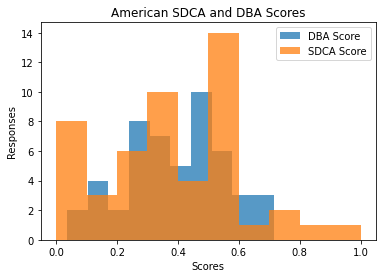

In [219]:
plt.title('American SDCA and DBA Scores')
eng_dba.mean(axis =1).hist(label = 'DBA Score', alpha = .75)
eng_sdca.mean(axis =1).hist(label = 'SDCA Score', alpha = .75)
plt.xlabel('Scores')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(eng_dba.mean(axis =1),
                       eng_sdca.mean(axis =1),
                       alternative = 'greater')
print(stat, p)
plt.savefig('./graphs/international_scores.png')

983.0 0.03281553893358544


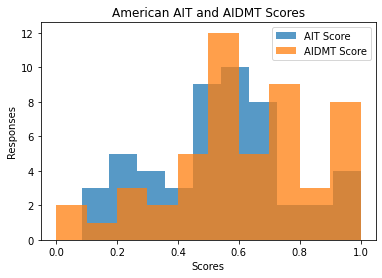

In [223]:
plt.title('American AIT and AIDMT Scores')
eng_ait.mean(axis =1).hist(label = 'AIT Score', alpha = .75)
eng_aidmt.mean(axis =1).hist(label = 'AIDMT Score', alpha = .75)
plt.xlabel('Scores')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(eng_ait.mean(axis =1),
                       eng_aidmt.mean(axis =1),
                       alternative = 'less')
print(stat, p)
plt.savefig('./graphs/international_scores.png')

1641.0 0.007234068082585376


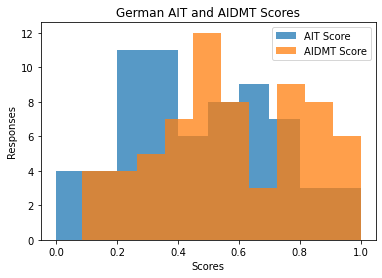

In [246]:
plt.title('German AIT and AIDMT Scores')
grm_ait.mean(axis =1).hist(label = 'AIT Score', alpha = .75)
grm_aidmt.mean(axis =1).hist(label = 'AIDMT Score', alpha = .75)
plt.xlabel('Scores')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(grm_ait.mean(axis =1),
                       grm_aidmt.mean(axis =1),
                       alternative = 'less')
print(stat, p)
plt.savefig('./graphs/international_scores.png')

916.5 0.4818527331299527


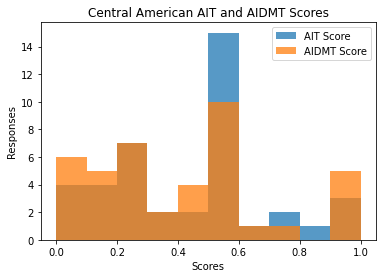

In [249]:
plt.title('Central American AIT and AIDMT Scores')
spn_ait.mean(axis =1).hist(label = 'AIT Score', alpha = .75)
spn_aidmt.mean(axis =1).hist(label = 'AIDMT Score', alpha = .75)
plt.xlabel('Scores')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(spn_ait.mean(axis =1),
                       spn_aidmt.mean(axis =1),
                       alternative = 'two-sided')
print(stat, p)
plt.savefig('./graphs/international_scores.png')

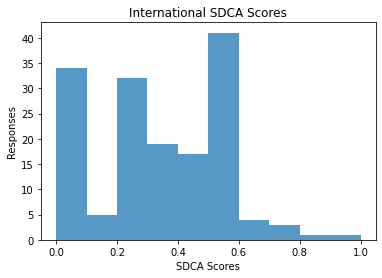

In [175]:
plt.title('International SDCA Scores')
sdca.mean(axis =1).hist(alpha = .75)
plt.xlabel('SDCA Scores')
plt.ylabel('Responses')
plt.grid(False)
plt.savefig('./graphs/international_sdca.png')

14761.5 0.0011685848128117288


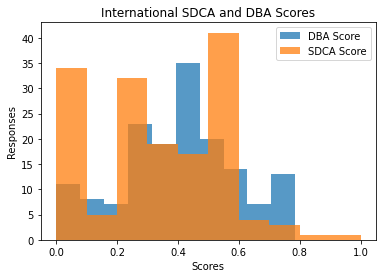

In [185]:
plt.title('International SDCA and DBA Scores')
dba.mean(axis =1).hist(label = 'DBA Score', alpha = .75)
sdca.mean(axis =1).hist(label = 'SDCA Score', alpha = .75)
plt.xlabel('Scores')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(dba.mean(axis =1),
                       sdca.mean(axis =1),
                       alternative = 'greater')
print(stat, p)
plt.savefig('./graphs/international_scores.png')

3099.5 0.009758940337465048


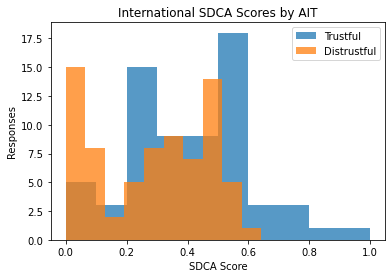

In [186]:
plt.title('International SDCA Scores by AIT')
sdca.iloc[ait.loc[ait.mean(axis = 1).gt(.5) == True].index].mean(axis =1).hist(label = 'Trustful', alpha = .75)
sdca.iloc[ait.loc[ait.mean(axis = 1).lt(.5) == True].index].mean(axis =1).hist(label = 'Distrustful', alpha = .75)
plt.xlabel('SDCA Score')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(sdca.iloc[ait.loc[ait.mean(axis = 1).gt(.5) == True].index].mean(axis =1),
                       sdca.iloc[ait.loc[ait.mean(axis = 1).lt(.5) == True].index].mean(axis =1),
                       alternative = 'two-sided')
print(stat, p)
plt.savefig('./graphs/international_sdca_trust_distrust.png')

In [188]:
stat, p = mannwhitneyu(sdca.iloc[ait.loc[ait.mean(axis = 1).gt(.5) == True].index].mean(axis =1),
                       dba.mean(axis =1),
                       alternative = 'two-sided')
print(stat,p)

5025.0 0.5966074915382804


In [189]:
stat, p = mannwhitneyu(sdca.iloc[ait.loc[ait.mean(axis = 1).lt(.5) == True].index].mean(axis =1),
                       dba.mean(axis =1),
                       alternative = 'two-sided')
print(stat,p)

4089.0 0.0002697645721902261


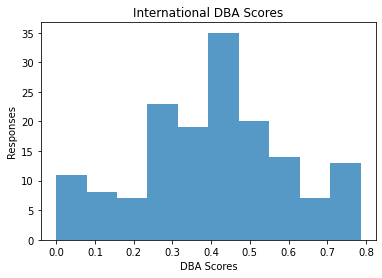

In [184]:
plt.title('International DBA Scores')
dba.mean(axis =1).hist(alpha = .75)
plt.xlabel('DBA Scores')
plt.ylabel('Responses')
plt.grid(False)
plt.savefig('./graphs/international_dba.png')

2238.0 0.31879041771840855


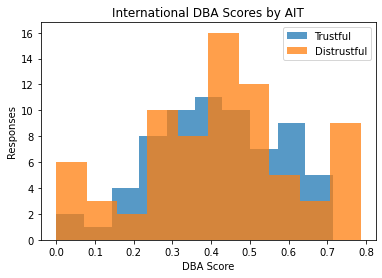

In [180]:
plt.title('International DBA Scores by AIT')
dba.iloc[ait.loc[ait.mean(axis = 1).gt(.5) == True].index].mean(axis =1).hist(label = 'Trustful', alpha = .75)
dba.iloc[ait.loc[ait.mean(axis = 1).lt(.5) == True].index].mean(axis =1).hist(label = 'Distrustful', alpha = .75)
plt.xlabel('DBA Score')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)
stat, p = mannwhitneyu(dba.iloc[ait.loc[ait.mean(axis = 1).gt(.5) == True].index].mean(axis =1),
                       dba.iloc[ait.loc[ait.mean(axis = 1).lt(.5) == True].index].mean(axis =1),
                       alternative = 'two-sided')
print(stat, p)
plt.savefig('./graphs/international_dba_trust_distrust.png')

 What is your trust level to utilize Artificial Intelligence or Fully Autonomous Technologies?
1951.0 0.042408158573597386
 What is your trust level that self-driving cars will be able to navigate in crowded pedestrian areas?
2105.5 0.00448637925318851
 What is your trust level in the ability of self-driving cars to navigate safely with no-person in the vehicle. 
1947.0 0.04502378707951622


<Figure size 432x288 with 0 Axes>

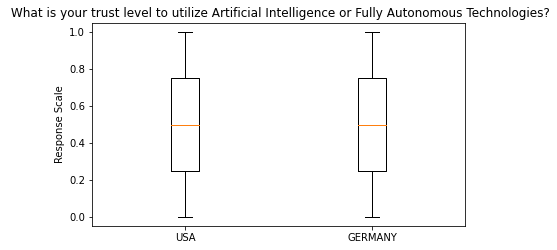

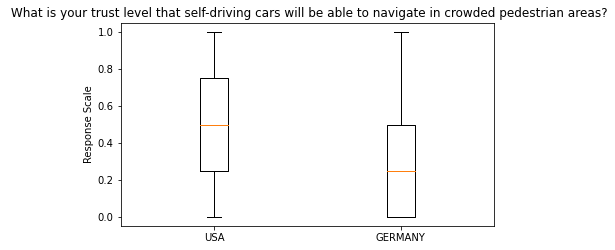

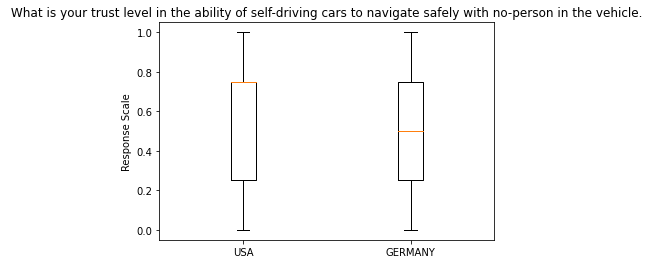

In [267]:
for i, eng_question in enumerate(eng_ait.columns):
    stat, p = mannwhitneyu(eng_ait[eng_question], grm_ait[grm_ait.columns[i]],  alternative = 'greater')
    if(p<=.05):
        print(eng_question[7:])
        print(stat, p)
        plt.tight_layout()
        plt.subplots_adjust(top = 0.8)
        fig2, ax2 = plt.subplots()
        ax2.set_title(f'{eng_question[7:]}', loc = 'center', wrap = True)
        fig2.set_xticklabels=('USA', 'GERMANY')
        ax2.boxplot([eng_ait[eng_question],
                     grm_ait[grm_ait.columns[i]]
                    ])
        plt.xticks([1,2], ['USA',
                           'GERMANY',
                          ])
        plt.ylabel('Response Scale')
        plt.savefig(f'./graphs/eng_grm/{eng_question}_eng_grm.png')
        

In [268]:
for i, eng_question in enumerate(eng_ait.columns):
    stat, p = mannwhitneyu(eng_ait[eng_question], grm_ait[grm_ait.columns[i]],  alternative = 'less')
    if(p<=.05):
        print(eng_question[7:])
        print(stat, p)
        plt.tight_layout()
        plt.subplots_adjust(top = 0.8)
        fig2, ax2 = plt.subplots()
        ax2.set_title(f'{eng_question[7:]}', loc = 'center', wrap = True)
        fig2.set_xticklabels=('USA', 'GERMANY')
        ax2.boxplot([eng_ait[eng_question],
                     grm_ait[grm_ait.columns[i]]
                    ])
        plt.xticks([1,2], ['USA',
                           'GERMANY',
                          ])
        plt.ylabel('Response Scale')
        plt.savefig(f'./graphs/eng_grm/{eng_question}_eng_grm.png')
        

 What is your trust level that self-driving cars will keep your own safety as it's primary objective?
1291.5 0.014180129320223965
 What is your trust level in the ability of self-driving cars to navigate safely with no-person in the vehicle. 
1393.5 0.0013158770959560253


<Figure size 432x288 with 0 Axes>

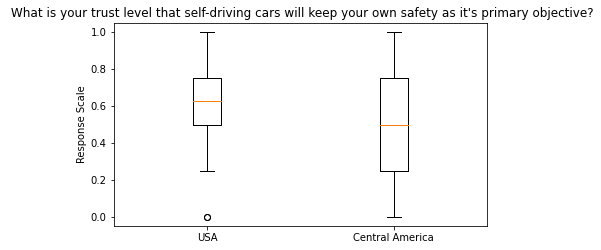

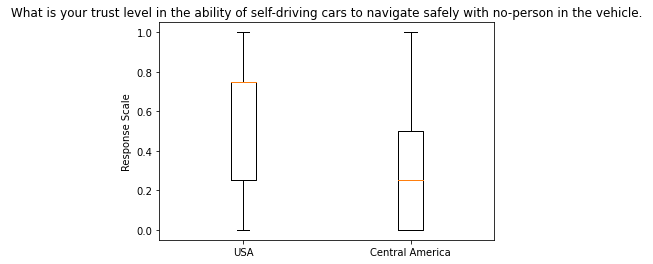

In [278]:
for i, eng_question in enumerate(eng_ait.columns):
    stat, p = mannwhitneyu(eng_ait[eng_question], spn_ait[spn_ait.columns[i]],  alternative = 'greater')
    if(p<=.05):
        print(eng_question[7:])
        print(stat, p)
        plt.tight_layout()
        plt.subplots_adjust(top = 0.8)
        fig2, ax2 = plt.subplots()
        ax2.set_title(f'{eng_question[7:]}', loc = 'center', wrap = True)
        fig2.set_xticklabels=('USA', 'Central America')
        ax2.boxplot([eng_ait[eng_question],
                     spn_ait[spn_ait.columns[i]]
                    ])
        plt.xticks([1,2], ['USA',
                           'Central America',
                          ])
        plt.ylabel('Response Scale')
        plt.savefig(f'./graphs/eng_spn/{eng_question}_eng_spn.png')
        

 What is your trust level that self-driving cars will be able to navigate in crowded pedestrian areas?
1053.0 0.023643765812922064


<Figure size 432x288 with 0 Axes>

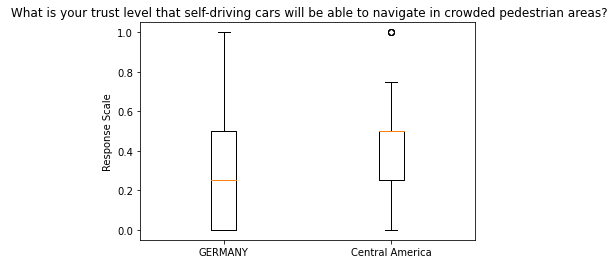

In [281]:
for i, eng_question in enumerate(eng_ait.columns):
    stat, p = mannwhitneyu(grm_ait[grm_ait.columns[i]], spn_ait[spn_ait.columns[i]],  alternative = 'less')
    if(p<=.05):
        print(eng_question[7:])
        print(stat, p)
        plt.tight_layout()
        plt.subplots_adjust(top = 0.8)
        fig2, ax2 = plt.subplots()
        ax2.set_title(f'{eng_question[7:]}', loc = 'center', wrap = True)
        fig2.set_xticklabels=('GERMANY', 'Central America')
        ax2.boxplot([grm_ait[grm_ait.columns[i]],
                     spn_ait[spn_ait.columns[i]]
                    ])
        plt.xticks([1,2], ['GERMANY',
                           'Central America',
                          ])
        plt.ylabel('Response Scale')
        plt.savefig(f'./graphs/grm_spn/{eng_question}_grm_spn.png')
        

 What is your trust level that self-driving cars will successfully get you to the EXACT destination you requested?
1739.5 0.005347066204609978


<Figure size 432x288 with 0 Axes>

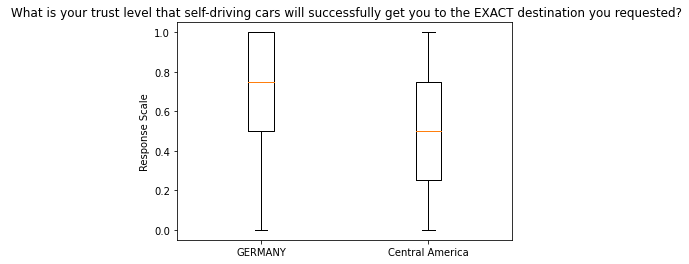

In [265]:
for i, eng_question in enumerate(eng_ait.columns):
    stat, p = mannwhitneyu(grm_ait[grm_ait.columns[i]], spn_ait[spn_ait.columns[i]],  alternative = 'greater')
    if(p<=.05):
        print(eng_question[7:])
        print(stat, p)
        plt.tight_layout()
        plt.subplots_adjust(top = 0.8)
        fig2, ax2 = plt.subplots()
        ax2.set_title(f'{eng_question[7:]}', loc = 'center', wrap = True)
        fig2.set_xticklabels=('GERMANY', 'Central America')
        ax2.boxplot([grm_ait[grm_ait.columns[i]],
                     spn_ait[spn_ait.columns[i]]
                    ])
        plt.xticks([1,2], ['GERMANY',
                           'Central America',
                          ])
        plt.ylabel('Response Scale')
        plt.savefig(f'./graphs/grm_spn/{eng_question}_grm_spn.png')
        

In [212]:
for i, eng_question in enumerate(eng_ait.columns):
    stat, p = mannwhitneyu(eng_ait[eng_question], grm_ait[grm_ait.columns[i]],  alternative = '')
    if(p<=.05):
        print(eng_question[7:])
        print(stat, p)
        fig2, ax2 = plt.subplots()
        ax2.set_title(f'{eng_question[7:]}')
        fig2.set_xticklabels=('USA', 'GERMANY')
        ax2.boxplot([eng_ait[eng_question],
                     grm_ait[grm_ait.columns[i]]
                    ])
        plt.xticks([1,2], ['USA',
                           'GERMANY',
                          ])
        

ait_41. What is your trust level that self-driving cars will keep your own safety as it's primary objective?
1291.5 0.02836025864044793
ait_45. What is your trust level in the ability of self-driving cars to navigate safely with no-person in the vehicle. 
1393.5 0.0026317541919120505


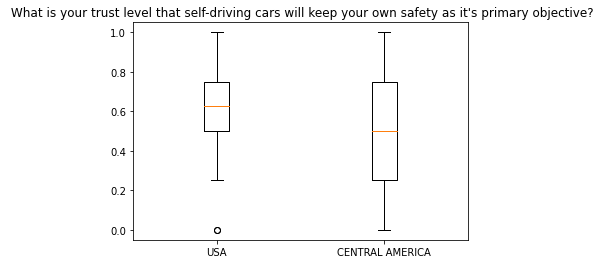

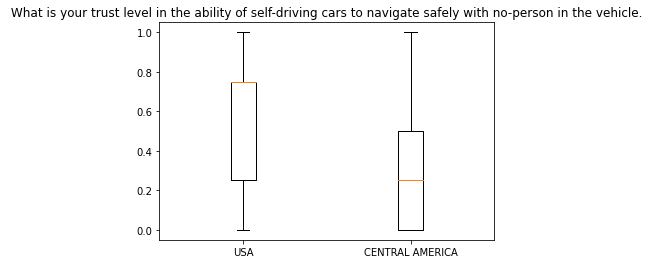

In [208]:
for i, eng_question in enumerate(eng_ait.columns):
    stat, p = mannwhitneyu(eng_ait[eng_question], spn_ait[spn_ait.columns[i]],  alternative = 'two-sided')
    if(p<=.05):
        print(eng_question)
        print(stat, p)
        fig2, ax2 = plt.subplots()
        ax2.set_title(f'{eng_question[7:]}')
        fig2.set_xticklabels=('USA', 'CENTRAL AMERICA')
        ax2.boxplot([eng_ait[eng_question],
                     spn_ait[spn_ait.columns[i]]
                    ])
        plt.xticks([1,2], ['USA',
                           'CENTRAL AMERICA',
                          ])


1053.0 0.04728753162584413
1739.5 0.010694132409219957


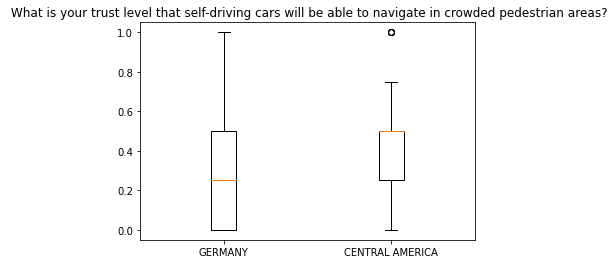

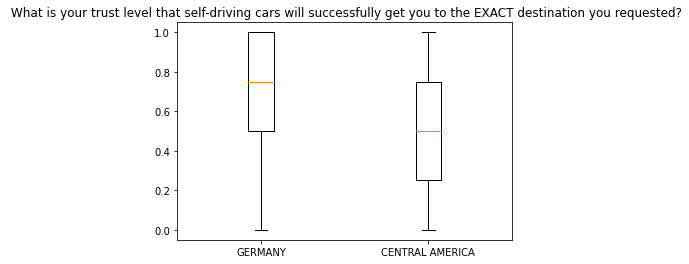

In [209]:
for i, grm_question in enumerate(grm_ait.columns):
    stat, p = mannwhitneyu(grm_ait[grm_question], spn_ait[spn_ait.columns[i]],  alternative = 'two-sided')
    if(p<=.05):
        print(stat,p)
        fig2, ax2 = plt.subplots()
        ax2.set_title(f'{eng_ait[eng_ait.columns[i]].name[7:]}')
        fig2.set_xticklabels=('GERMANY', 'CENTRAL AMERICA')
        ax2.boxplot([grm_ait[grm_question],
                     spn_ait[spn_ait.columns[i]]
                    ])
        plt.xticks([1,2], ['GERMANY',
                           'CENTRAL AMERICA',
                          ])

 Which best describes your behavior most of the time when it comes to signaling lane changes while driving at night: 
1956.0 0.042996680811920096
0.0
0     0.00
1     0.00
2     0.25
3     0.00
4     0.25
5     1.00
6     0.00
7     0.25
8     1.00
9     0.00
10    0.00
11    0.00
12    0.25
13    0.25
14    0.00
15    0.00
16    1.00
17    0.25
18    0.50
19    0.25
20    0.00
21    0.25
22    0.50
23    0.25
24    0.50
25    0.25
26    0.00
27    0.00
28    0.00
29    0.00
30    0.50
31    1.00
32    0.00
33    0.00
34    0.00
35    0.25
36    0.00
37    0.50
38    0.00
39    0.00
40    0.25
41    0.50
42    0.00
43    0.00
44    0.00
45    0.00
46    0.00
47    0.00
48    0.00
49    0.00
Name: dbg_37. Which best describes your behavior most of the time when it comes to signaling lane changes while driving at night: , dtype: float64
0.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


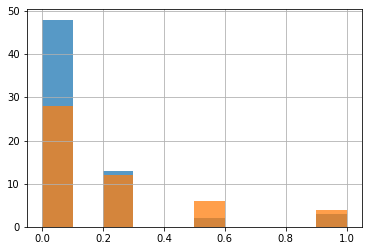

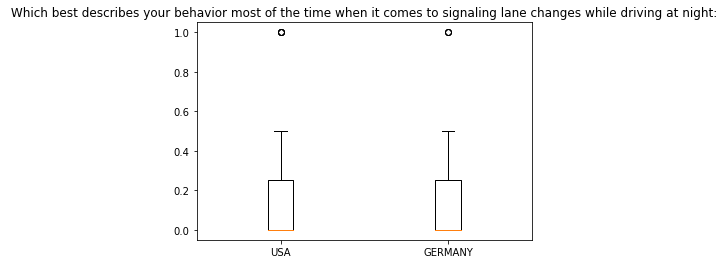

In [210]:
for i, eng_question in enumerate(eng_dss.columns):
    try:
        stat, p = mannwhitneyu(eng_dss[eng_question], grm_dss[grm_dss.columns[i]],  alternative = 'two-sided')
    except:
        continue
    if(p<=.05):
        print(eng_question[7:])
        print(stat, p)
        print(eng_dss[eng_question].median())
        print(eng_dss[eng_question])
        print(grm_dss[grm_dss.columns[i]].median())
        print(grm_dss[grm_dss.columns[i]].hist(alpha = .75))
        print(eng_dss[eng_question].hist(alpha = .75))
        fig2, ax2 = plt.subplots()
        ax2.set_title(f'{eng_question[7:]}')
        fig2.set_xticklabels=('USA', 'GERMANY')
        ax2.boxplot([eng_dss[eng_question],
                     grm_dss[grm_dss.columns[i]]
                    ])
        plt.xticks([1,2], ['USA',
                           'GERMANY',
                          ])


1356.0 0.4645091791171253


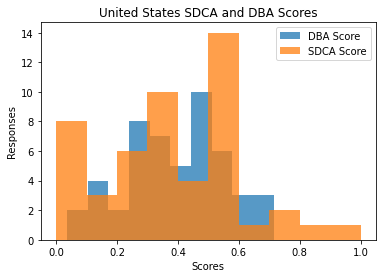

In [206]:
plt.title('United States SDCA and DBA Scores')
eng_dba.mean(axis =1).hist(label = 'DBA Score', alpha = .75)
eng_sdca.mean(axis =1).hist(label = 'SDCA Score', alpha = .75)
plt.xlabel('Scores')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(eng_dba.mean(axis =1),
                       eng_sdca.mean(axis =1),
                       alternative = 'two-sided')
print(stat, p)

2821.0 0.001610162311929224


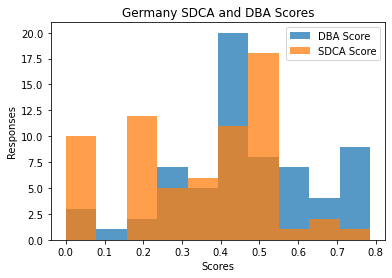

In [203]:
plt.title('Germany SDCA and DBA Scores')
grm_dba.mean(axis =1).hist(label = 'DBA Score', alpha = .75)
grm_sdca.mean(axis =1).hist(label = 'SDCA Score', alpha = .75)
plt.xlabel('Scores')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(grm_dba.mean(axis =1),
                       grm_sdca.mean(axis =1),
                       alternative = 'greater')
print(stat, p)

2821.0 0.001610162311929224


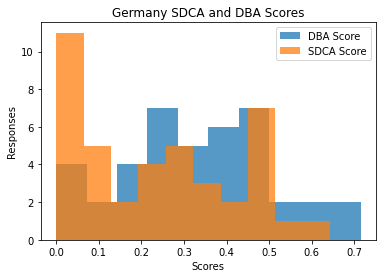

In [204]:
plt.title('Germany SDCA and DBA Scores')
spn_dba.mean(axis =1).hist(label = 'DBA Score', alpha = .75)
spn_sdca.mean(axis =1).hist(label = 'SDCA Score', alpha = .75)
plt.xlabel('Scores')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(grm_dba.mean(axis =1),
                       grm_sdca.mean(axis =1),
                       alternative = 'greater')
print(stat, p)

1025.5 0.04270687986567733


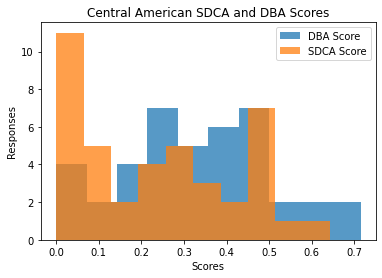

In [251]:
plt.title('Central American SDCA and DBA Scores')
spn_dba.mean(axis =1).hist(label = 'DBA Score', alpha = .75)
spn_sdca.mean(axis =1).hist(label = 'SDCA Score', alpha = .75)
plt.xlabel('Scores')
plt.ylabel('Responses')
plt.legend()
plt.grid(False)

stat, p = mannwhitneyu(spn_dba.mean(axis =1),
                       spn_sdca.mean(axis =1),
                       alternative = 'greater')
print(stat, p)